In [1]:
'''
本文件的作用为描述性分析绘图，分析在报告中，此代码只展示数据、绘图和结果
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick    #导入百分比
from tqdm import tqdm
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
df = pd.read_csv('data_0601.csv')
df.head(10)

,index,month,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,5,2,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,...,False,False,False,False,False,Day,Day,Day,Day,3
1,9,2,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,...,False,False,False,False,False,Day,Day,Day,Day,3
2,11,2,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,...,False,False,False,False,False,Day,Day,Day,Day,3
3,23,2,37.0,32.4,96.0,29.63,8.0,West,5.8,0.00,...,False,False,False,False,False,Day,Day,Day,Day,3
4,39,2,26.6,18.2,86.0,29.62,1.5,West,8.1,0.01,...,False,False,False,False,False,Night,Night,Night,Night,3
5,43,2,25.0,15.5,88.0,29.65,1.0,SW,9.2,0.02,...,False,False,False,False,False,Night,Night,Night,Day,3
6,44,2,23.0,10.1,88.0,29.66,2.0,West,15.0,0.00,...,False,False,False,True,False,Night,Night,Night,Day,3
7,45,2,25.0,15.5,88.0,29.65,1.0,SW,9.2,0.02,...,False,False,False,False,False,Night,Night,Night,Day,3
8,47,2,24.8,16.1,86.0,29.64,1.0,SW,8.1,0.01,...,False,False,False,False,False,Night,Night,Night,Day,3
9,52,2,21.9,9.8,92.0,29.71,2.0,WSW,12.7,0.01,...,False,False,False,False,False,Night,Night,Day,Day,3


In [3]:
def clip_vol(vol,scale = 3):
    '''
    本函数作用为剔除一定规模的离群点，使得箱线图更加清晰和美观
    '''
    iqr = scale * (vol.quantile(0.75) - vol.quantile(0.25))
    low = vol.quantile(0.25) - 1.5 * iqr
    high = vol.quantile(0.75) + 1.5 * iqr
    tmp = []
    for i in vol:
        if i > low and i< high:
            tmp.append(i)
    return np.asarray(tmp)

# 温度箱线图

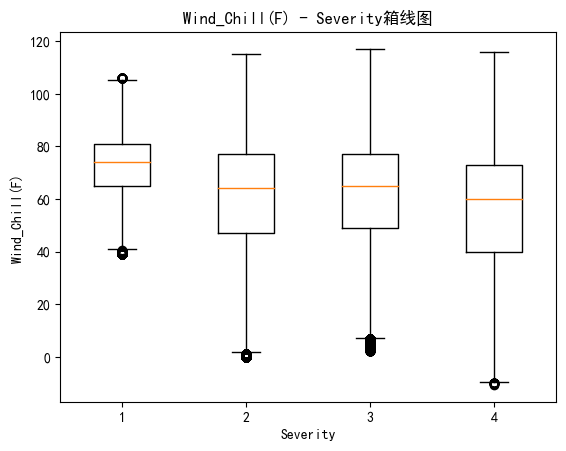

In [4]:
cname = 'Wind_Chill(F)'
vol1 = df[df['Severity'] == 1][cname]
vol2 = df[df['Severity'] == 2][cname]
vol3 = df[df['Severity'] == 3][cname]
vol4 = df[df['Severity'] == 4][cname]

vols = [vol1, vol2, vol3, vol4]
for i in range(len(vols)):
    vols[i] = clip_vol(vols[i], scale =1)
ax = plt.subplot()
ax.boxplot(vols)
ax.set_xticklabels(['1','2','3','4'])
plt.xlabel('Severity')
plt.ylabel(cname)
plt.title(f'{cname} - Severity箱线图')
plt.show()

In [5]:
# 湿度箱线图

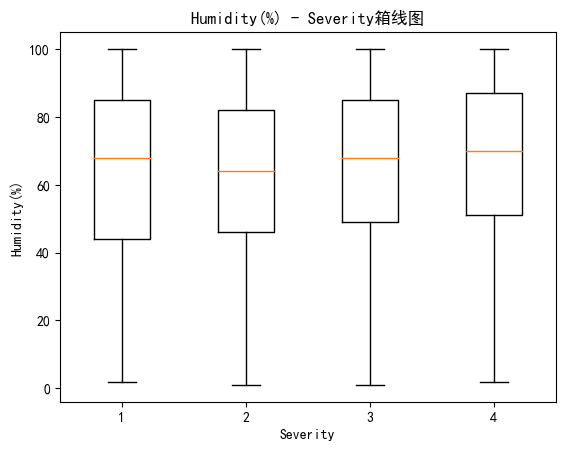

In [6]:
cname = 'Humidity(%)'
vol1 = df[df['Severity'] == 1][cname]
vol2 = df[df['Severity'] == 2][cname]
vol3 = df[df['Severity'] == 3][cname]
vol4 = df[df['Severity'] == 4][cname]

vols = [vol1, vol2, vol3, vol4]
for i in range(len(vols)):
    vols[i] = clip_vol(vols[i], scale =3)
ax = plt.subplot()
ax.boxplot(vols)
ax.set_xticklabels(['1','2','3','4'])
plt.xlabel('Severity')
plt.ylabel(cname)
plt.title(f'{cname} - Severity箱线图')
plt.show()

# 压力箱线图

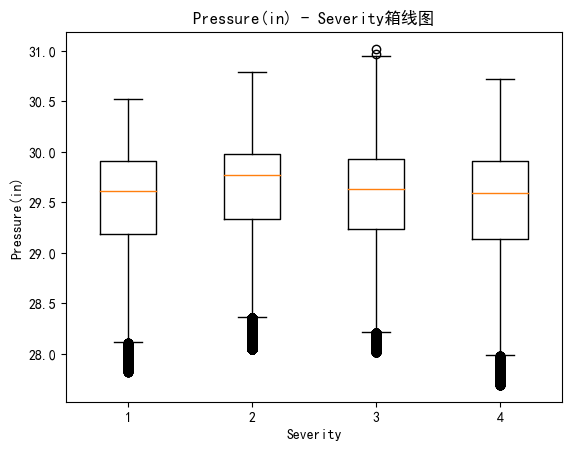

In [7]:
cname = 'Pressure(in)'
vol1 = df[df['Severity'] == 1][cname]
vol2 = df[df['Severity'] == 2][cname]
vol3 = df[df['Severity'] == 3][cname]
vol4 = df[df['Severity'] == 4][cname]

vols = [vol1, vol2, vol3, vol4]
for i in range(len(vols)):
    vols[i] = clip_vol(vols[i], scale =1)
ax = plt.subplot()
ax.boxplot(vols)
ax.set_xticklabels(['1','2','3','4'])
plt.xlabel('Severity')
plt.ylabel(cname)
plt.title(f'{cname} - Severity箱线图')
plt.show()

# S1天气饼状图 vs S4天气饼状图

In [8]:
df_s1 = df[df['Severity'] == 1]
df_s4 = df[df['Severity'] == 4]

In [9]:
def wea_trans(x,p = 7):
    if x not in list(shengxian.keys())[0:p]:
        return 'others'
    else:
        return x

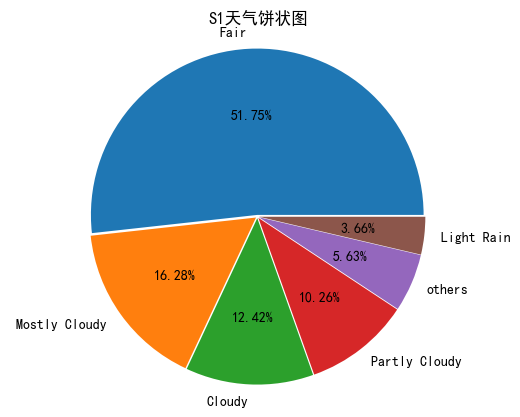

In [10]:
shengxian = df_s1['Weather_Condition'].value_counts()
shengxian = df_s1['Weather_Condition'].apply(lambda x: wea_trans(x,5)).value_counts()
sizes = list(shengxian.values)
plt.pie(sizes, labels = shengxian.keys(),autopct = '%1.2f%%',explode = [0.01] * len(sizes))
plt.title("S1天气饼状图")  # 设置标题
plt.axis('equal')
plt.show()

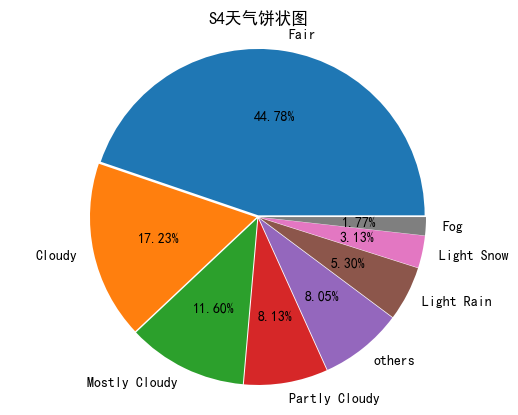

In [11]:
shengxian = df_s4['Weather_Condition'].value_counts()
shengxian = df_s4['Weather_Condition'].apply(lambda x: wea_trans(x,7)).value_counts()
sizes = list(shengxian.values)
plt.pie(sizes, labels = shengxian.keys(),autopct = '%1.2f%%',explode = [0.01] * len(sizes))
plt.title("S4天气饼状图")  # 设置标题
plt.axis('equal')
plt.show()

# 月份柱状图

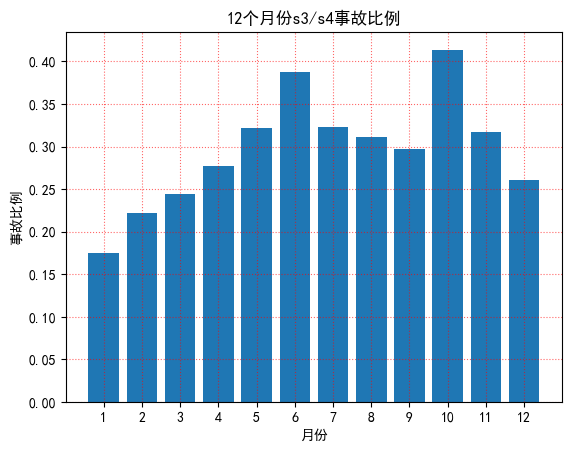

In [12]:
rate2 = []
month = []
for i in range(1,13,1):
    month.append(i)
    tmp = df[df['month']==i]
    length = len(tmp)
    s34 = len(tmp[(tmp['Severity'] == 3) | (tmp['Severity'] == 4)])
    rate2.append(s34 / length)
x=month 
y=rate2
x_label=[str(i) for i in month]
plt.xticks(x, x_label)  # 绘制x刻度标签
plt.bar(x, y)  # 绘制y刻度标签
plt.title(f'12个月份s3/s4事故比例')
plt.xlabel('月份')
plt.ylabel('事故比例')
#设置网格刻度
plt.grid(True,linestyle=':',color='r',alpha=0.6)
plt.show()

# 有无交通灯下严重分布对比

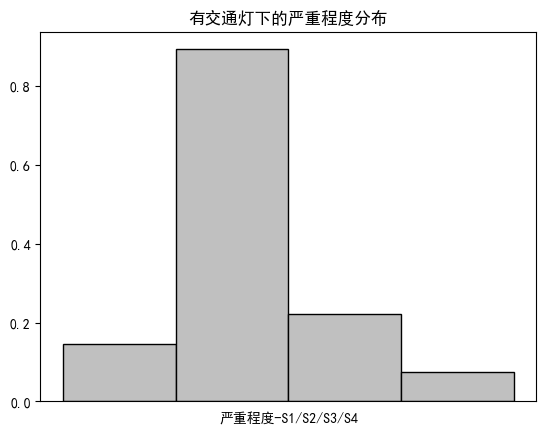

In [13]:
plt.hist(df[df['Traffic_Signal'] == True]['Severity'],4,color='silver',edgecolor='black',density = True)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])
plt.xlabel('严重程度-S1/S2/S3/S4')
# plt.ylabel('占比')
plt.title('有交通灯下的严重程度分布')
plt.show()

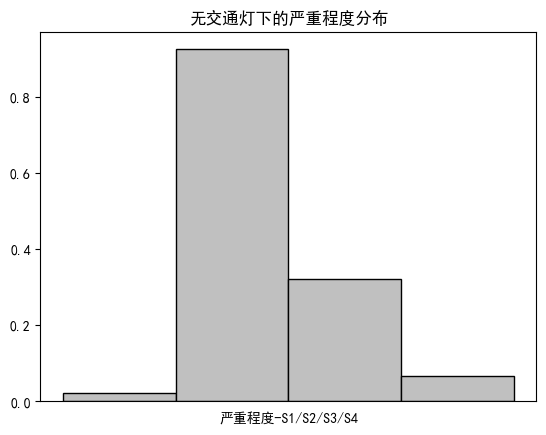

In [14]:
plt.hist(df[df['Traffic_Signal'] == False]['Severity'],4,color='silver',edgecolor='black',density = True)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])
plt.xlabel('严重程度-S1/S2/S3/S4')
# plt.ylabel('占比')
plt.title('无交通灯下的严重程度分布')
plt.show()

# 美国交通事故数量与严重比例图

In [15]:
df2 = pd.read_csv('US_Accidents_March23.csv')
df2.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:49<00:00,  6.21s/it]


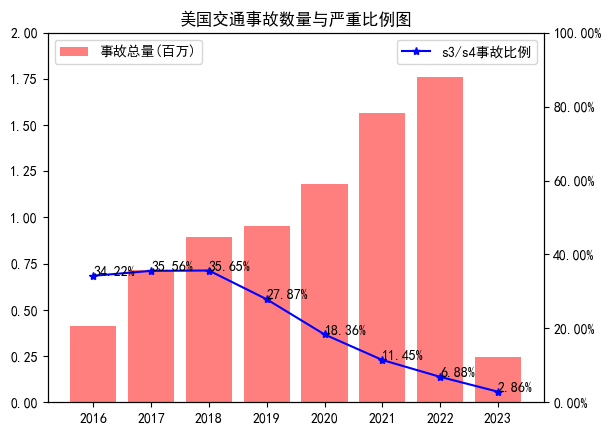

In [16]:
nums = []
rate = []
year = []
for i in tqdm(range(2016,2024,1)):
    year.append(i)
    tmp = df2[pd.to_datetime(df2['Start_Time']).dt.year == i]
    length = len(tmp)
    nums.append(length)
    s34 = len(tmp[(tmp['Severity'] == 3) | (tmp['Severity'] == 4)])
    rate.append(s34 / length * 100)
nums = [num / 1e6 for num in nums] # 把数量级换成百万
x = plt.figure()
a = x.add_subplot(111)   # 一行一列一个
a.bar(year,nums,color='red',alpha=0.5,label='事故总量(百万)')
a.legend(loc='upper left')
a.set_ylim([0,2])

b = a.twinx()   #共用x轴
b.plot(year,rate,color='b',marker='*',label='s3/s4事故比例')
b.legend()
bfb = mtick.FormatStrFormatter('%.2f%%')
b.yaxis.set_major_formatter(bfb)
b.set_ylim([0,100])

for i,j in zip(year,rate):
    plt.text(i,j,str(round(j,2))+'%')
plt.title('美国交通事故数量与严重比例图')
plt.show()